# Tutorial9: CLIP图像文本分类

本节旨在展示使用‌CLIP模型进行图像文本分类的简单案例，使用OPENAI提供的CLIP库以及给出的示例图片。

‌CLIP模型（Contrastive Language-Image Pre-training）是一种由OpenAI在2021年发布的多模态预训练模型，旨在通过大量文本-图像对进行训练，以理解和匹配图像内容与相应的自然语言描述‌。‌

分以下几步来实现：
1. 环境安装
2. 图像分类
    2.1 查看图像
    2.2 调用模型

## 1. 环境安装
 
请确保已经执行了 [tutorial_scow_for_ai](../tutorial_scow_for_ai.md) 中的"安装依赖、注册ipykernel"。

运行本教程需要先安装OPENAI提供的CLIP库，请使用以下代码安装：

~~~bash
pip install ftfy==6.3.1 regex==2024.11.6 tqdm==4.67.1
pip install git+https://github.com/openai/CLIP.git
~~~

建议使用1张910B NPU运行本教程。

## 2. 图像分类

### 2.1 查看图像

供模型调用的图像存储在同路径下的CLIP.png文件中，图像如下：

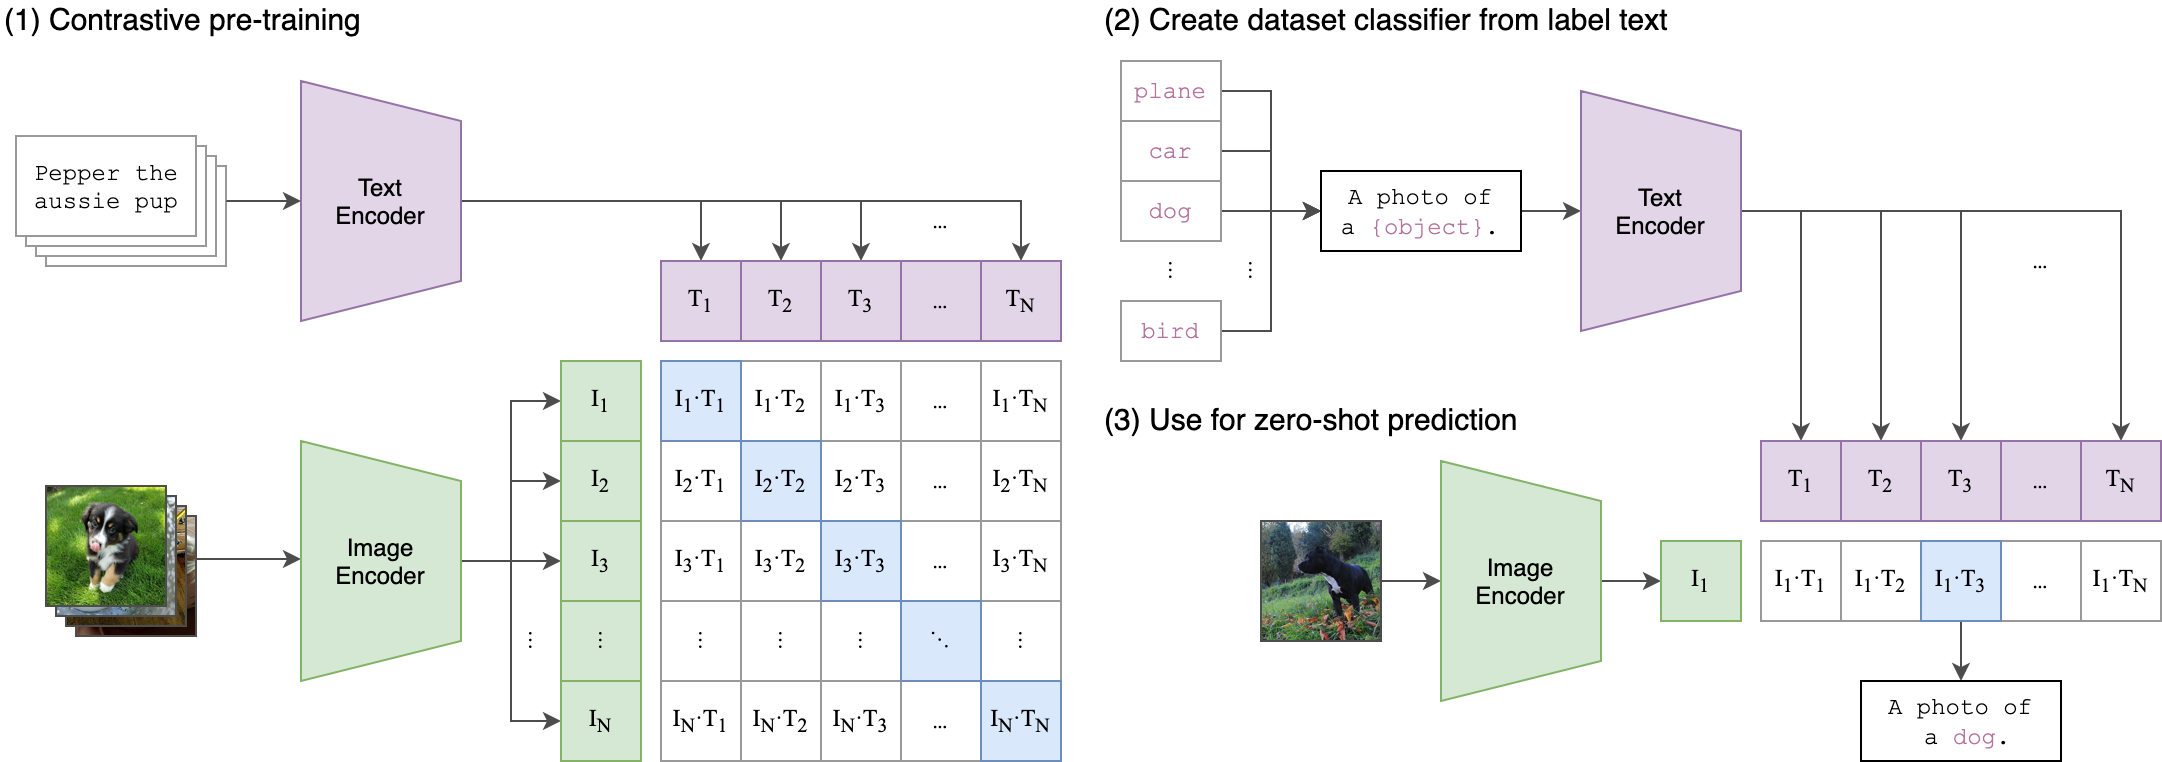

能够看出是CLIP模型的预训练和预测流程图，后面将调用CLIP对本图像进行分类

### 2.2 调用模型

运行以下代码调用CLIP模型进行图像分类

In [1]:
import torch
import torch_npu
import clip
from PIL import Image

# 设置设备为 NPU
device = "npu" if torch.npu.is_available() else "cpu"

# 加载 CLIP 模型
model, preprocess = clip.load("ViT-B/32", device=device)

# 加载图像和文本
image = preprocess(Image.open("CLIP.png")).unsqueeze(0).to(device)
text = clip.tokenize(["a diagram", "a dog", "a cat"]).to(device)

# 推理
with torch.no_grad():
    image_features = model.encode_image(image)
    text_features = model.encode_text(text)
    
    logits_per_image, logits_per_text = model(image, text)
    probs = logits_per_image.softmax(dim=-1).cpu().numpy()

print("Label probs:", probs)

/data/home/2401213359/software/miniconda3/envs/tutorial/lib/python3.9/site-packages/torch_npu/utils/path_manager.py:82: UserWarning: Warning: The /usr/local/Ascend/ascend-toolkit/latest owner does not match the current user.
  warnings.warn(f"Warning: The {path} owner does not match the current user.")
/data/home/2401213359/software/miniconda3/envs/tutorial/lib/python3.9/site-packages/torch_npu/utils/path_manager.py:82: UserWarning: Warning: The /usr/local/Ascend/ascend-toolkit/7.0.1.5/aarch64-linux/ascend_toolkit_install.info owner does not match the current user.
  warnings.warn(f"Warning: The {path} owner does not match the current user.")
[W compiler_depend.ts:615] Warning: expandable_segments currently defaults to false. You can enable this feature by `export PYTORCH_NPU_ALLOC_CONF = expandable_segments:True`. (function operator())


Label probs: [[0.9927   0.004253 0.003016]]


可以看到a diagram对应的百分比最高，可知该图像最符合diagram的描述，与事实相符。

---

> 作者: 黎颖; 褚苙扬; 龙汀汀
>
> 联系方式: yingliclaire@pku.edu.cn; cly2412307718@stu.pku.edu.cn; l.tingting@pku.edu.cn